In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

train = pd.read_csv('new_train2.csv')
train.isnull().sum()

train['y']=train['y'].eq('yes').mul(1)
result = train['y']

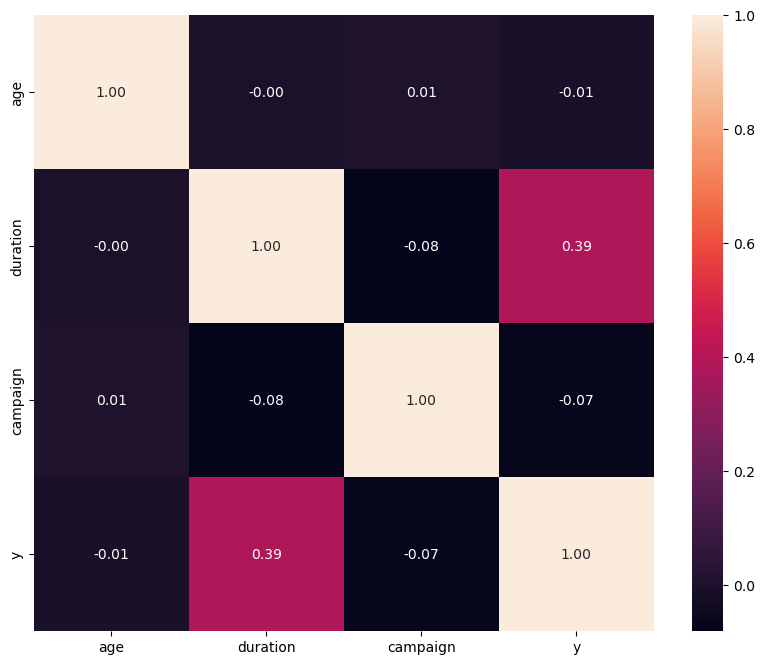

In [2]:
# Correlation matrix for numerical features
correlation_matrix = train.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

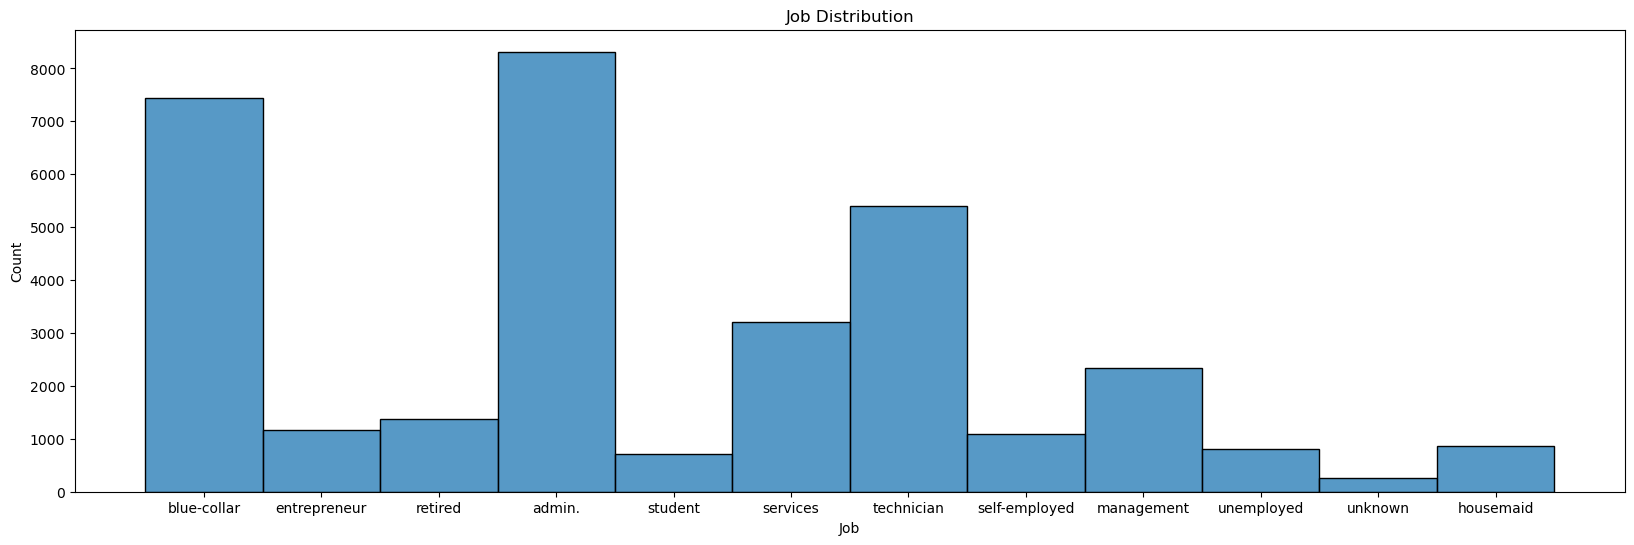

In [3]:
# Job distribution
plt.figure(figsize=(20, 6))
sns.histplot(train['job'], bins=30, kde=False)
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

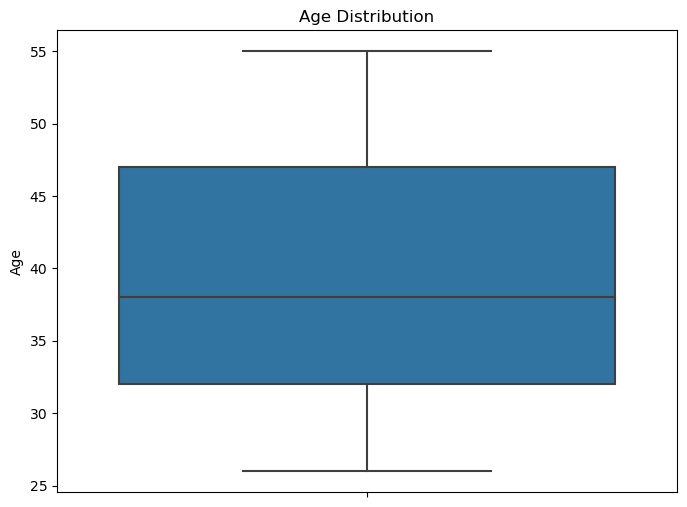

In [4]:
# Age distribution box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=train['age'])
plt.title('Age Distribution')
plt.ylabel('Age')
plt.show()

In [5]:
print(train.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')


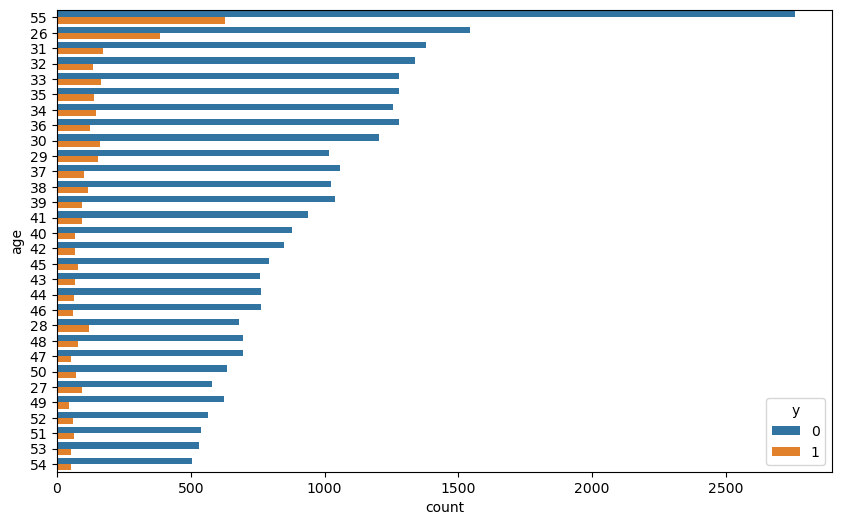

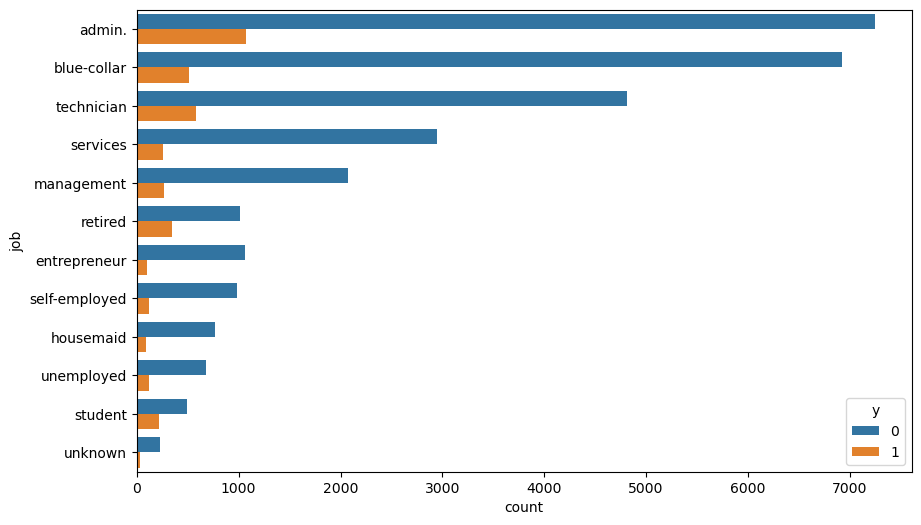

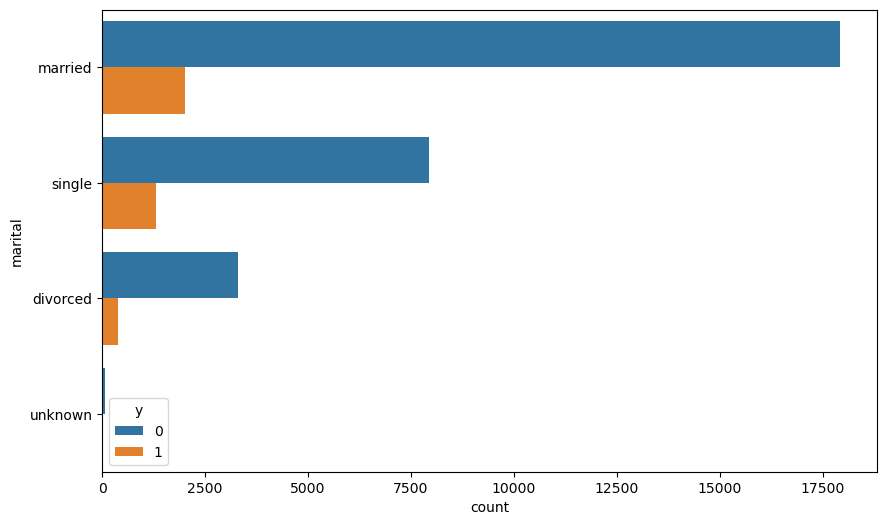

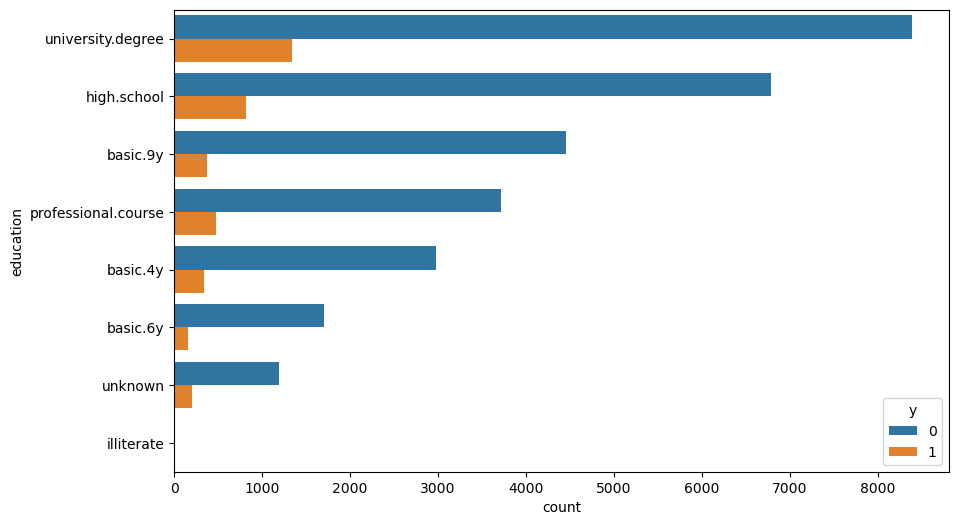

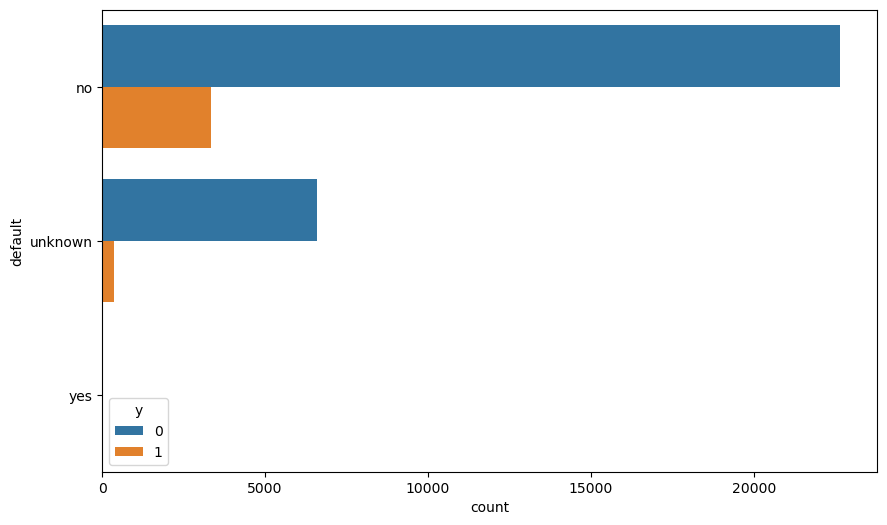

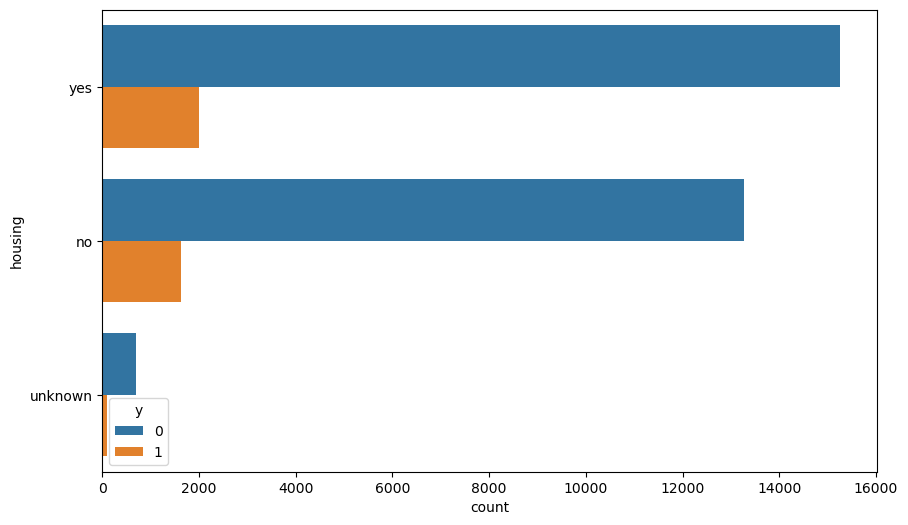

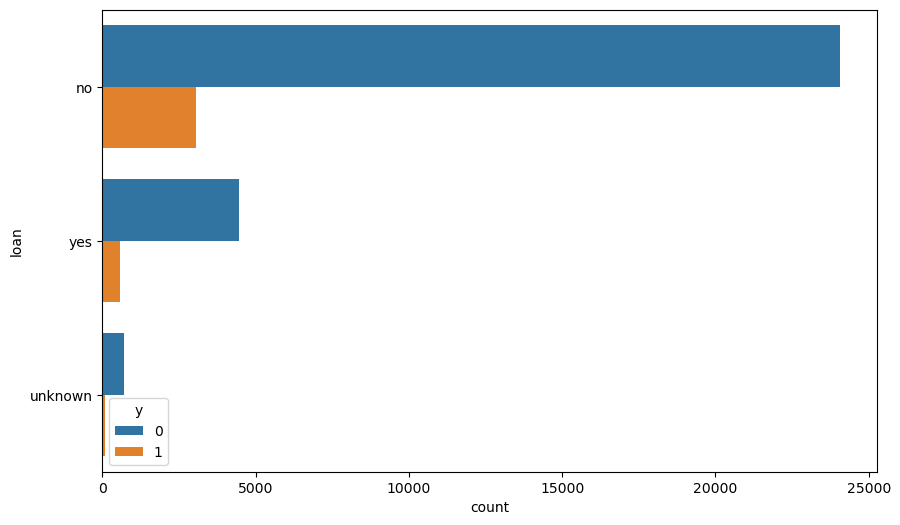

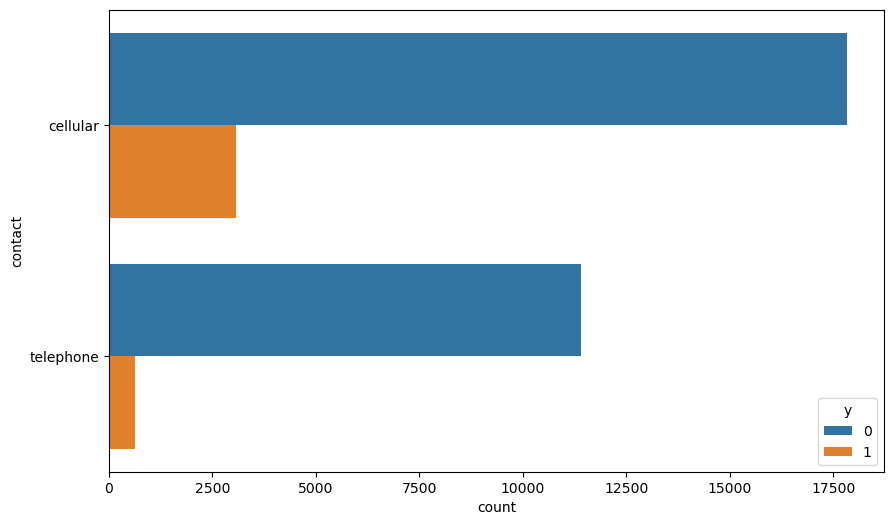

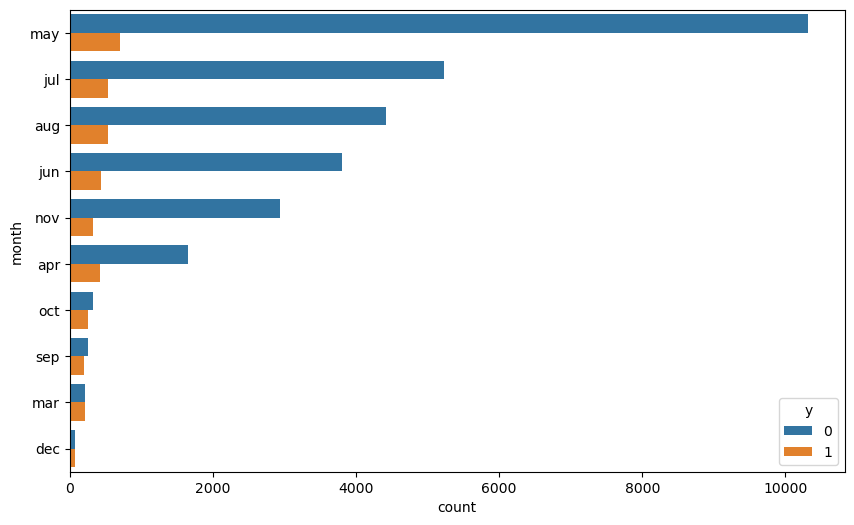

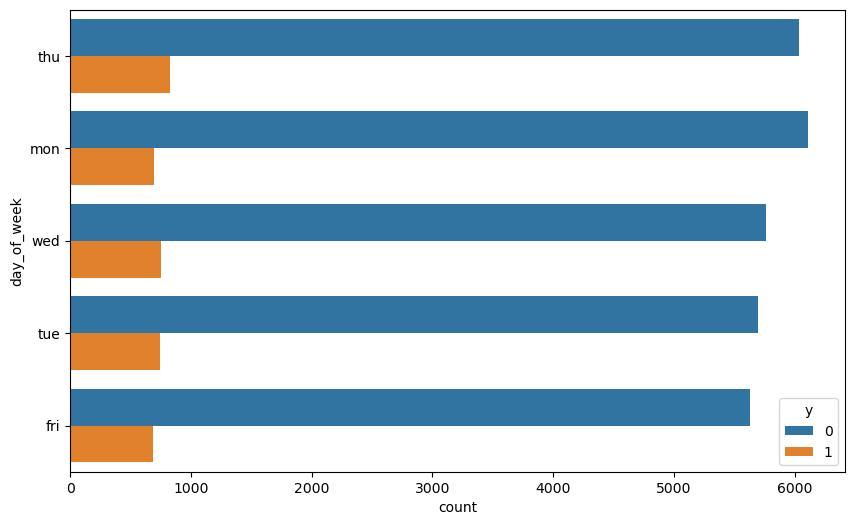

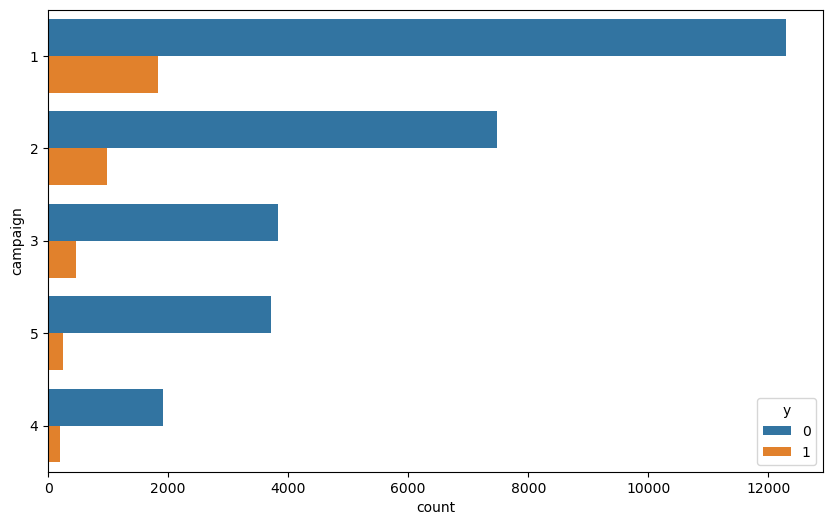

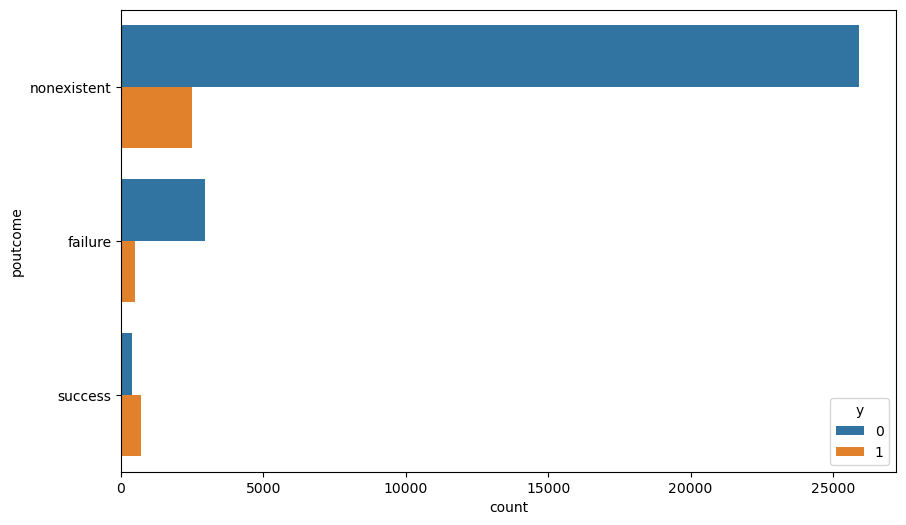

In [6]:
categorical_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 
                        'month', 'day_of_week', 'campaign', 'poutcome']
for col in categorical_cols:
    plt.figure(figsize=(10,6))  
    ax = sns.countplot(y=col, hue='y', data=train, order=train[col].value_counts().index)
    plt.show()

[2 1 0]


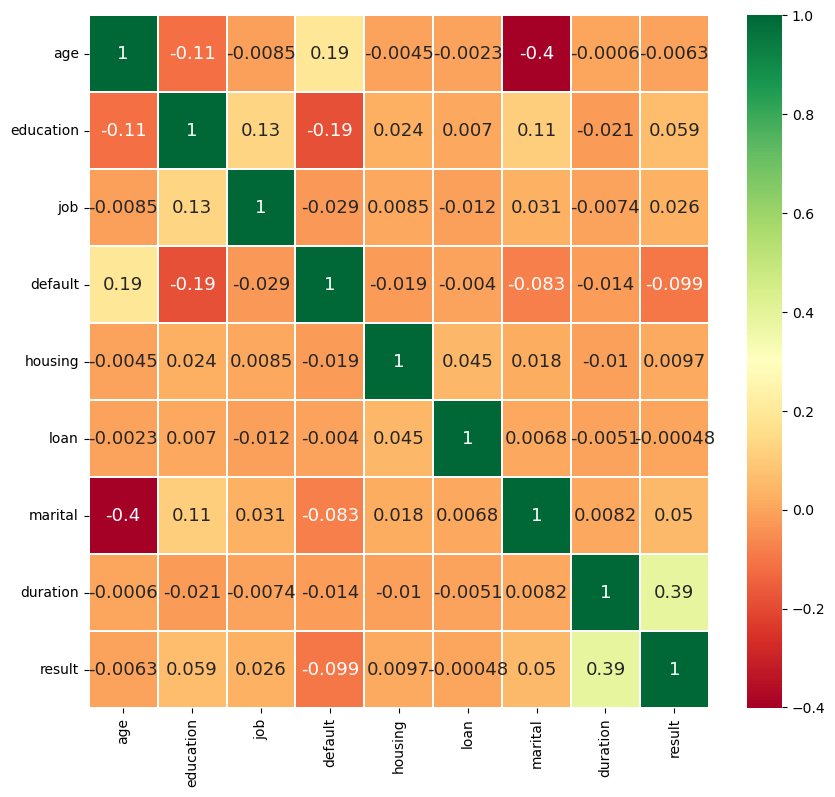

In [7]:
le = preprocessing.LabelEncoder()
le.fit(train.education.unique())
education_encoded = le.transform(train.education).tolist()

le = preprocessing.LabelEncoder()
le.fit(train.job.unique())
job_encoded = le.transform(train.job).tolist()

le = preprocessing.LabelEncoder()
le.fit(train.default.unique())
default_encoded = le.transform(train.default).tolist()

le = preprocessing.LabelEncoder()
le.fit(train.housing.unique())
housing_encoded = le.transform(train.housing).tolist()

le = preprocessing.LabelEncoder()
le.fit(train.loan.unique())
loan_encoded = le.transform(train.loan).tolist()


le = preprocessing.LabelEncoder()
le.fit(train.marital.unique())
marital_encoded = le.transform(train.marital).tolist()
print(le.transform(['single','married','divorced']))

age_encoded = train.age.tolist()

duration_encoded = train.duration.tolist()
y_encoded = train.y.tolist()

data = {'age':age_encoded, 'education':education_encoded, 'job':job_encoded, 'default':default_encoded,'housing':housing_encoded,'loan':loan_encoded,'marital':marital_encoded,'duration':duration_encoded,'result':y_encoded}
df = pd.DataFrame(data)
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':13})
fig=plt.gcf()
fig.set_size_inches(10,9)